In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline

Total Samples: 2155
Feature Count: 168

Class Distribution:
label
1    1488
0     667
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11080\1231185267.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


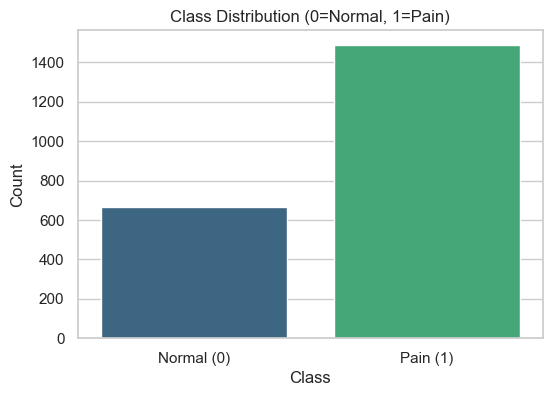

In [18]:
# Load the data generated in the previous step
df = pd.read_csv("../data/processed/processed.csv")

# Display basic info
print(f"Total Samples: {len(df)}")
print(f"Feature Count: {len(df.columns) - 1}") # Minus 1 for the label column

# Check class distribution
class_counts = df['label'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Visualize the balance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution (0=Normal, 1=Pain)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'Pain (1)'])
plt.show()

In [19]:
# Separate Features (X) and Target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split: 80% for Training, 20% for Testing
# stratify=y ensures both sets have a mix of Pain/Normal
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Testing shapes:  X={X_test.shape},  y={y_test.shape}")

Training shapes: X=(1724, 168), y=(1724,)
Testing shapes:  X=(431, 168),  y=(431,)


In [20]:
# Initialize the model
# n_estimators=100: Uses 100 decision trees
# class_weight='balanced': Helps because your "Normal" class is now smaller than "Pain"
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

print("Training started...")
model.fit(X_train, y_train)
print("Training complete!")

Training started...
Training complete!


In [21]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"--- MODEL PERFORMANCE ---")
print(f"Accuracy: {accuracy:.2%}")
print(f"F1-Score: {f1:.2%}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pain']))

--- MODEL PERFORMANCE ---
Accuracy: 70.30%
F1-Score: 78.23%

Detailed Classification Report:
              precision    recall  f1-score   support

      Normal       0.52      0.55      0.53       133
        Pain       0.79      0.77      0.78       298

    accuracy                           0.70       431
   macro avg       0.66      0.66      0.66       431
weighted avg       0.71      0.70      0.71       431



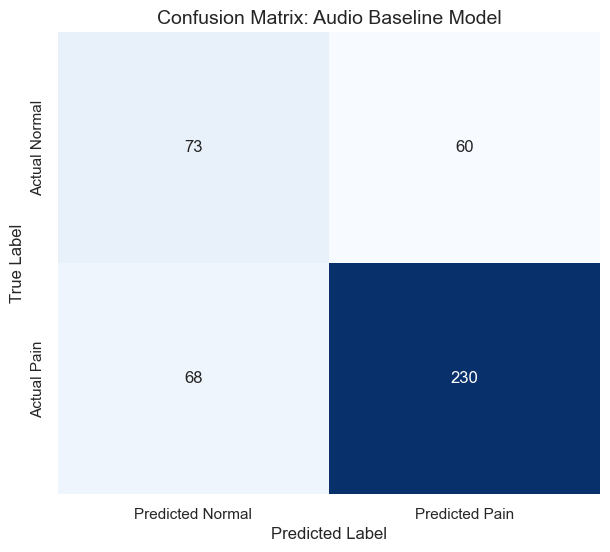

In [22]:
# Plot Confusion Matrix
plt.figure(figsize=(7, 6))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Normal', 'Predicted Pain'],
            yticklabels=['Actual Normal', 'Actual Pain'])

plt.title('Confusion Matrix: Audio Baseline Model', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Initialize Gradient Boosting (often beats Random Forest for audio)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

print("Training Gradient Boosting Model...")
gb_model.fit(X_train, y_train)

# 2. Evaluate
y_pred_gb = gb_model.predict(X_test)

print(f"--- GRADIENT BOOSTING RESULTS ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2%}")
print(f"F1-Score (Pain): {f1_score(y_test, y_pred_gb):.2%}")
print("\nReport:")
print(classification_report(y_test, y_pred_gb, target_names=['Normal', 'Pain']))

# 3. If this is better, save THIS model instead
if accuracy_score(y_test, y_pred_gb) > accuracy_score(y_test, y_pred):
    joblib.dump(gb_model, '../saved_models/best_audio_model.pkl')
    print("New best model saved!")

Training Gradient Boosting Model...
--- GRADIENT BOOSTING RESULTS ---
Accuracy: 71.00%
F1-Score (Pain): 78.92%

Report:
              precision    recall  f1-score   support

      Normal       0.53      0.54      0.54       133
        Pain       0.79      0.79      0.79       298

    accuracy                           0.71       431
   macro avg       0.66      0.66      0.66       431
weighted avg       0.71      0.71      0.71       431

New best model saved!
